In [1]:
import numpy as np
import matplotlib.pyplot as plt

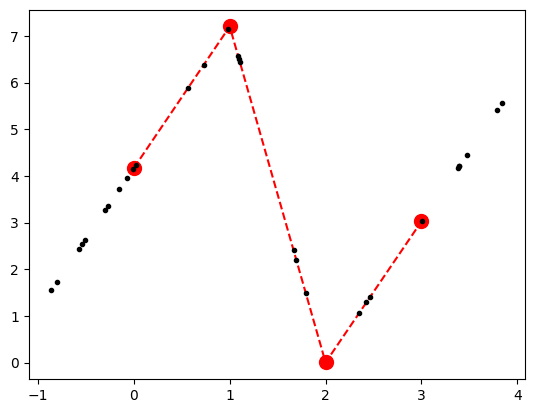

In [10]:
def linear_interp_extrap(x, xp, yp):
    """
    Perform vectorised linear interpolation and extrapolation.
    
    Parameters:
    x  : array-like, points to evaluate the interpolation
    xp : array-like, known x-values (must be sorted)
    yp : array-like, known y-values corresponding to xp

    Returns:
    y  : array-like, interpolated or extrapolated values at x
    """
    x = np.asarray(x)
    xp = np.asarray(xp)
    yp = np.asarray(yp)

    # Compute slopes for interpolation
    slopes = np.diff(yp) / np.diff(xp)

    # Find indices where each x belongs in xp
    indices = np.searchsorted(xp, x) - 1
    indices = np.clip(indices, 0, len(slopes) - 1)  # Clip to valid range

    # Perform interpolation/extrapolation
    y = yp[indices] + slopes[indices] * (x - xp[indices])
    return y

np.random.seed(1)

# Example usage:
xp = np.array([0, 1, 2, 3])
# yp = np.array([0, 2, 4, 8])
yp = np.random.uniform(0, 10, len(xp))
x = np.random.uniform(-1, 4, 30)
y = linear_interp_extrap(x, xp, yp)

plt.plot(xp, yp, 'r', marker='.', ls='--', ms=20)
plt.plot(x, y, 'k.')
